In [51]:
# Basics
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

## Load Datasets

In [8]:
# load in player fantasy stats data as player_df
qb_2015 = pd.read_csv('data/season data/2015/2015_QB.csv')
qb_2016 = pd.read_csv('data/season data/2016/2016_QB.csv')
qb_2017 = pd.read_csv('data/season data/2017/2017_QB.csv')
qb_2018 = pd.read_csv('data/season data/2018/2018_QB.csv')
qb_2019 = pd.read_csv('data/season data/2019/2019_QB.csv')
qb_2020 = pd.read_csv('data/season data/2020/2020_QB.csv')
qb_2021 = pd.read_csv('data/season data/2021/2021_QB.csv')
qb_2021.head()

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Josh Allen (BUF),409.0,646.0,63.3,"4,407",6.8,36.0,15.0,26.0,122.0,763.0,6.0,3.0,17.0,417.7,24.6,100.0%
1,2.0,Justin Herbert (LAC),443.0,672.0,65.9,"5,014",7.5,38.0,15.0,31.0,63.0,302.0,3.0,1.0,17.0,395.6,23.3,99.9%
2,3.0,Tom Brady (TB),485.0,719.0,67.5,"5,316",7.4,43.0,12.0,22.0,28.0,81.0,2.0,3.0,17.0,386.7,22.7,95.5%
3,4.0,Patrick Mahomes II (KC),436.0,658.0,66.3,"4,828",7.3,37.0,13.0,28.0,66.0,381.0,2.0,4.0,17.0,374.2,22.0,100.0%
4,5.0,Matthew Stafford (LAR),404.0,601.0,67.2,"4,886",8.1,41.0,17.0,30.0,32.0,43.0,0.0,2.0,17.0,346.8,20.4,92.4%


In [9]:
# load in player fantasy stats data as player_df
rb_2015 = pd.read_csv('data/season data/2015/2015_RB.csv')
rb_2016 = pd.read_csv('data/season data/2016/2016_RB.csv')
rb_2017 = pd.read_csv('data/season data/2017/2017_RB.csv')
rb_2018 = pd.read_csv('data/season data/2018/2018_RB.csv')
rb_2019 = pd.read_csv('data/season data/2019/2019_RB.csv')
rb_2020 = pd.read_csv('data/season data/2020/2020_RB.csv')
rb_2021 = pd.read_csv('data/season data/2021/2021_RB.csv')
rb_2021.head()

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Jonathan Taylor (IND),332.0,"1,811",5.5,83.0,30.0,18.0,40.0,51.0,360.0,9.0,2.0,2.0,17.0,373.1,21.9,100.0%
1,2.0,Austin Ekeler (LAC),206.0,911,4.4,28.0,3.0,12.0,70.0,94.0,647.0,9.2,8.0,3.0,16.0,343.8,21.5,100.0%
2,3.0,Najee Harris (PIT),307.0,"1,200",3.9,37.0,8.0,7.0,74.0,94.0,467.0,6.3,3.0,0.0,17.0,300.7,17.7,99.9%
3,4.0,Joe Mixon (CIN),292.0,"1,205",4.1,32.0,7.0,13.0,42.0,48.0,314.0,7.5,3.0,1.0,16.0,287.9,18.0,100.0%
4,5.0,James Conner (ARI),202.0,752,3.7,35.0,4.0,15.0,37.0,39.0,375.0,10.1,3.0,0.0,15.0,257.7,17.2,99.1%


In [10]:
# load in player fantasy stats data as player_df
wr_2015 = pd.read_csv('data/season data/2015/2015_WR.csv')
wr_2016 = pd.read_csv('data/season data/2016/2016_WR.csv')
wr_2017 = pd.read_csv('data/season data/2017/2017_WR.csv')
wr_2018 = pd.read_csv('data/season data/2018/2018_WR.csv')
wr_2019 = pd.read_csv('data/season data/2019/2019_WR.csv')
wr_2020 = pd.read_csv('data/season data/2020/2020_WR.csv')
wr_2021 = pd.read_csv('data/season data/2021/2021_WR.csv')
wr_2021.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Cooper Kupp (LAR),145.0,191.0,"1,947",13.4,59.0,57.0,16.0,4.0,18.0,0.0,0.0,17.0,439.5,25.9,100.0%
1,2.0,Davante Adams (LV),123.0,169.0,"1,553",12.6,59.0,37.0,11.0,0.0,0.0,0.0,0.0,16.0,344.3,21.5,100.0%
2,3.0,Deebo Samuel (SF),77.0,121.0,"1,405",18.2,83.0,53.0,6.0,59.0,365.0,8.0,2.0,16.0,339.0,21.2,100.0%
3,4.0,Justin Jefferson (MIN),108.0,167.0,"1,616",15.0,56.0,45.0,10.0,6.0,14.0,0.0,1.0,17.0,330.4,19.4,100.0%
4,5.0,Ja'Marr Chase (CIN),81.0,128.0,"1,455",18.0,82.0,49.0,13.0,7.0,21.0,0.0,1.0,17.0,304.6,17.9,100.0%


In [11]:
# load in player fantasy stats data as player_df
te_2015 = pd.read_csv('data/season data/2015/2015_te.csv')
te_2016 = pd.read_csv('data/season data/2016/2016_te.csv')
te_2017 = pd.read_csv('data/season data/2017/2017_te.csv')
te_2018 = pd.read_csv('data/season data/2018/2018_te.csv')
te_2019 = pd.read_csv('data/season data/2019/2019_te.csv')
te_2020 = pd.read_csv('data/season data/2020/2020_te.csv')
te_2021 = pd.read_csv('data/season data/2021/2021_te.csv')
te_2021.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1.0,Mark Andrews (BAL),107.0,153.0,"1,361",12.7,43.0,27.0,9.0,1.0,0.0,0.0,0.0,17.0,301.1,17.7,100.0%
1,2.0,Travis Kelce (KC),92.0,134.0,"1,125",12.2,69.0,20.0,9.0,2.0,3.0,1.0,1.0,16.0,262.8,16.4,100.0%
2,3.0,Dalton Schultz (DAL),78.0,104.0,808,10.4,32.0,8.0,8.0,0.0,0.0,0.0,0.0,17.0,208.8,12.3,90.6%
3,4.0,George Kittle (SF),71.0,94.0,910,12.8,48.0,17.0,6.0,3.0,20.0,0.0,1.0,14.0,198.0,14.1,98.7%
4,5.0,Zach Ertz (ARI),74.0,112.0,763,10.3,47.0,9.0,5.0,1.0,4.0,0.0,0.0,17.0,180.7,10.6,92.9%


## Clean DFs

In [37]:
def clean_df(df, position):
    if position == 'Quarterback':
        to_drop = ['Rank', 'CMP', 'ATT', 'PCT', 'YDS', 'Y/A', 'TD', 'INT', 'SACKS', 'ATT.1', 'YDS.1', 'TD.1', 'FL', 
                   'G', 'FPTS/G', 'ROST']
        
    elif position == 'Running Back':
        to_drop = ['Rank', 'ATT', 'YDS', 'Y/A', 'LG', '20+', 'TD', 'REC', 'TGT', 'Y/R', 'YDS.1', 'TD.1', 'FL', 
                   'G', 'FPTS/G', 'ROST']
        
    elif position == 'Wide Receiver':
        to_drop = ['Rank', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT', 'YDS.1', 'TD.1', 'FL', 
                   'G', 'FPTS/G', 'ROST']
        
    elif position == 'Tight End':
        to_drop = ['Rank', 'REC', 'TGT', 'YDS', 'LG', '20+', 'Y/R', 'TD', 'ATT', 'YDS.1', 'TD.1', 'FL', 
                   'G', 'FPTS/G', 'ROST']
        
        

    # Drop columns
    df = df.drop(to_drop, axis=1).dropna()
    df['Player'] = df['Player'].str.split('(').str.get(0)
    df['Player'] = df['Player'].astype(str).str.strip()
    return df

In [33]:
qb_2015_pts = clean_df(qb_2015, 'Quarterback')
qb_2016_pts = clean_df(qb_2016, 'Quarterback')
qb_2017_pts = clean_df(qb_2017, 'Quarterback')
qb_2018_pts = clean_df(qb_2018, 'Quarterback')
qb_2019_pts = clean_df(qb_2019, 'Quarterback')
qb_2020_pts = clean_df(qb_2020, 'Quarterback')
qb_2021_pts = clean_df(qb_2021, 'Quarterback')

qb_2015_pts

,Player,FPTS
0,Cam Newton,389.1
1,Tom Brady,344.7
2,Russell Wilson,336.3
3,Blake Bortles,316.1
4,Carson Palmer,309.2
...,...,...
70,Joe Webb III,-0.1
71,Scott Tolzien,-0.1
72,Jimmy Garoppolo,-0.3
73,Drew Stanton,-1.1


In [34]:
rb_2015_pts = clean_df(rb_2015, 'Running Back')
rb_2016_pts = clean_df(rb_2016, 'Running Back')
rb_2017_pts = clean_df(rb_2017, 'Running Back')
rb_2018_pts = clean_df(rb_2018, 'Running Back')
rb_2019_pts = clean_df(rb_2019, 'Running Back')
rb_2020_pts = clean_df(rb_2020, 'Running Back')
rb_2021_pts = clean_df(rb_2021, 'Running Back')
rb_2021_pts

,Player,FPTS
0,Jonathan Taylor,373.1
1,Austin Ekeler,343.8
2,Najee Harris,300.7
3,Joe Mixon,287.9
4,James Conner,257.7
...,...,...
192,Jordan Wilkins,0.0
193,Elijah McGuire,0.0
194,Kenjon Barner,0.0
195,Nate McCrary,-0.1


In [35]:
wr_2015_pts = clean_df(wr_2015, 'Wide Receiver')
wr_2016_pts = clean_df(wr_2016, 'Wide Receiver')
wr_2017_pts = clean_df(wr_2017, 'Wide Receiver')
wr_2018_pts = clean_df(wr_2018, 'Wide Receiver')
wr_2019_pts = clean_df(wr_2019, 'Wide Receiver')
wr_2020_pts = clean_df(wr_2020, 'Wide Receiver')
wr_2021_pts = clean_df(wr_2021, 'Wide Receiver')
wr_2021_pts

,Player,FPTS
0,Cooper Kupp,439.5
1,Davante Adams,344.3
2,Deebo Samuel,339.0
3,Justin Jefferson,330.4
4,Ja'Marr Chase,304.6
...,...,...
262,Devin Smith,0.0
263,Alex Bachman,-0.3
264,J.J. Koski,-2.0
265,Travis Benjamin,-2.0


In [38]:
te_2015_pts = clean_df(te_2015, 'Tight End')
te_2016_pts = clean_df(te_2016, 'Tight End')
te_2017_pts = clean_df(te_2017, 'Tight End')
te_2018_pts = clean_df(te_2018, 'Tight End')
te_2019_pts = clean_df(te_2019, 'Tight End')
te_2020_pts = clean_df(te_2020, 'Tight End')
te_2021_pts = clean_df(te_2021, 'Tight End')
te_2021_pts

,Player,FPTS
0,Mark Andrews,301.1
1,Travis Kelce,262.8
2,Dalton Schultz,208.8
3,George Kittle,198.0
4,Zach Ertz,180.7
...,...,...
141,James Winchester,0.0
142,Patrick Scales,0.0
143,Andrew DePaola,0.0
144,Colin Thompson,0.0


## Concat DFs

In [39]:
df_2015_list = [qb_2015_pts, rb_2015_pts, wr_2015_pts, te_2015_pts]
df_2016_list = [qb_2016_pts, rb_2016_pts, wr_2016_pts, te_2016_pts]
df_2017_list = [qb_2017_pts, rb_2017_pts, wr_2017_pts, te_2017_pts]
df_2018_list = [qb_2018_pts, rb_2018_pts, wr_2018_pts, te_2018_pts]
df_2019_list = [qb_2019_pts, rb_2019_pts, wr_2019_pts, te_2019_pts]
df_2020_list = [qb_2020_pts, rb_2020_pts, wr_2020_pts, te_2020_pts]
df_2021_list = [qb_2021_pts, rb_2021_pts, wr_2021_pts, te_2021_pts]

In [40]:
df_2015 = pd.concat(df_2015_list, axis=0, ignore_index=True)    
df_2016 = pd.concat(df_2016_list, axis=0, ignore_index=True)
df_2017 = pd.concat(df_2017_list, axis=0, ignore_index=True) 
df_2018 = pd.concat(df_2018_list, axis=0, ignore_index=True) 
df_2019 = pd.concat(df_2019_list, axis=0, ignore_index=True) 
df_2020 = pd.concat(df_2020_list, axis=0, ignore_index=True) 
df_2021 = pd.concat(df_2021_list, axis=0, ignore_index=True) 
df_2021

,Player,FPTS
0,Josh Allen,417.7
1,Justin Herbert,395.6
2,Tom Brady,386.7
3,Patrick Mahomes II,374.2
4,Matthew Stafford,346.8
...,...,...
689,James Winchester,0.0
690,Patrick Scales,0.0
691,Andrew DePaola,0.0
692,Colin Thompson,0.0


## Load ADP Datasets

In [44]:
# load in player fantasy stats data as player_df
adp_2015 = pd.read_csv('data/adp/FantasyPros_2015_Overall_ADP_Rankings.csv')
adp_2016 = pd.read_csv('data/adp/FantasyPros_2016_Overall_ADP_Rankings.csv')
adp_2017 = pd.read_csv('data/adp/FantasyPros_2017_Overall_ADP_Rankings.csv')
adp_2018 = pd.read_csv('data/adp/FantasyPros_2018_Overall_ADP_Rankings.csv')
adp_2019 = pd.read_csv('data/adp/FantasyPros_2019_Overall_ADP_Rankings.csv')
adp_2020 = pd.read_csv('data/adp/FantasyPros_2020_Overall_ADP_Rankings.csv')
adp_2021 = pd.read_csv('data/adp/FantasyPros_2021_Overall_ADP_Rankings.csv')
adp_2021.head()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG
0,1.0,Christian McCaffrey,CAR,13,RB1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,Dalvin Cook,MIN,7,RB2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,Alvin Kamara,NO,6,RB3,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,Derrick Henry,TEN,13,RB4,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,Ezekiel Elliott,DAL,7,RB5,8.0,5.0,6.0,5.0,5.0,5.0,5.8


In [45]:
#Columns to drop
to_drop = ['Bye', 'Team', 'POS', 'ESPN', 'RTSports', 'MFL', 'Fantrax', 'FFC', 'Sleeper', 'AVG']

# Drop columns
adp_2015 = adp_2015.drop(to_drop, axis=1).dropna().head(100)
adp_2016 = adp_2016.drop(to_drop, axis=1).dropna().head(100)
adp_2017 = adp_2017.drop(to_drop, axis=1).dropna().head(100)
adp_2018 = adp_2018.drop(to_drop, axis=1).dropna().head(100)
adp_2019 = adp_2019.drop(to_drop, axis=1).dropna().head(100)
adp_2020 = adp_2020.drop(to_drop, axis=1).dropna().head(100)
adp_2021 = adp_2021.drop(to_drop, axis=1).dropna().head(100)
adp_2021.head()

,Rank,Player
0,1.0,Christian McCaffrey
1,2.0,Dalvin Cook
2,3.0,Alvin Kamara
3,4.0,Derrick Henry
4,5.0,Ezekiel Elliott


In [53]:
adp_2015_df = pd.merge(adp_2015, df_2015, how = 'left', on='Player').fillna(0)
adp_2016_df = pd.merge(adp_2016, df_2016, how = 'left', on='Player').fillna(0)
adp_2017_df = pd.merge(adp_2017, df_2017, how = 'left', on='Player').fillna(0)
adp_2018_df = pd.merge(adp_2018, df_2018, how = 'left', on='Player').fillna(0)
adp_2019_df = pd.merge(adp_2019, df_2019, how = 'left', on='Player').fillna(0)
adp_2020_df = pd.merge(adp_2020, df_2020, how = 'left', on='Player').fillna(0)
adp_2021_df = pd.merge(adp_2021, df_2021, how = 'left', on='Player').fillna(0)
adp_2021_df

,Rank,Player,FPTS
0,1.0,Christian McCaffrey,127.5
1,2.0,Dalvin Cook,206.3
2,3.0,Alvin Kamara,234.7
3,4.0,Derrick Henry,193.3
4,5.0,Ezekiel Elliott,252.1
...,...,...,...
95,96.0,Dallas Goedert,165.0
96,97.0,James Conner,257.7
97,98.0,D.J. Chark Jr.,34.4
98,99.0,Jarvis Landry,133.0


In [48]:
adp_2015_df.to_csv('data/adp_2015.csv')
adp_2016_df.to_csv('data/adp_2016.csv')
adp_2017_df.to_csv('data/adp_2017.csv')
adp_2018_df.to_csv('data/adp_2018.csv')
adp_2019_df.to_csv('data/adp_2019.csv')
adp_2020_df.to_csv('data/adp_2020.csv')
adp_2021_df.to_csv('data/adp_2021.csv')

In [56]:
adp_2021_df

,Rank,Player,FPTS
0,1.0,Christian McCaffrey,127.5
1,2.0,Dalvin Cook,206.3
2,3.0,Alvin Kamara,234.7
3,4.0,Derrick Henry,193.3
4,5.0,Ezekiel Elliott,252.1
...,...,...,...
95,96.0,Dallas Goedert,165.0
96,97.0,James Conner,257.7
97,98.0,D.J. Chark Jr.,34.4
98,99.0,Jarvis Landry,133.0


In [49]:
def adp_plot(df, year = ''):
    plt.figure(figsize=(20,15))
    p1 = sns.regplot('Rank', 'FPTS', data=df, ci=None)

    for line in range(0,df.shape[0]):
         p1.text(df['Rank'][line]+0.2, df['FPTS'][line], 
         df['Player'][line], ha='left', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},
         size='x-large', color='black', weight='normal')

    plt.title(f'ADP vs {year} Projections', fontsize=25)
    # Set x-axis label
    plt.xlabel('ADP', fontsize=20)
    # Set y-axis label
    plt.ylabel('Actual Points', fontsize=20);
    return adp_plot

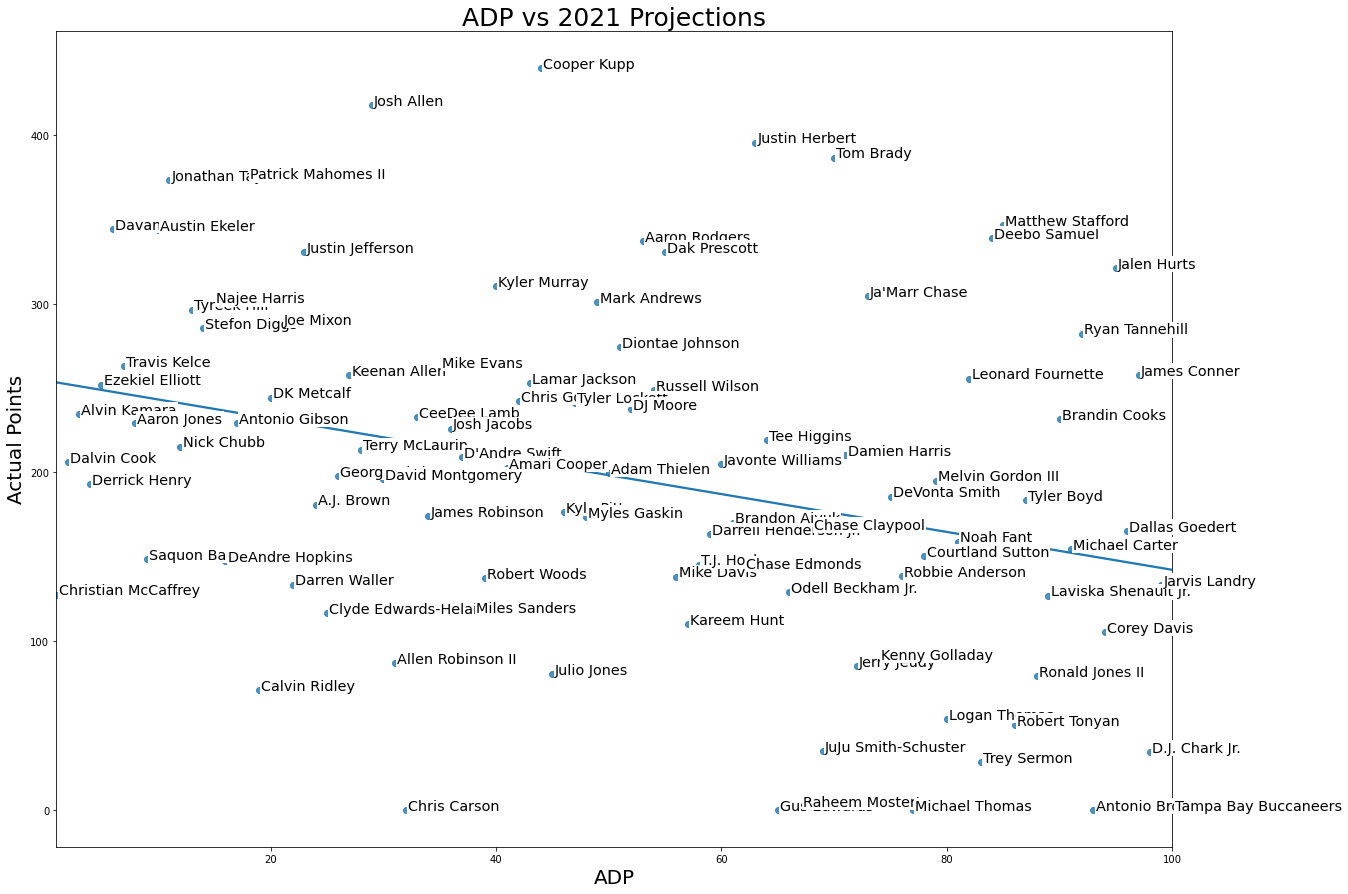

In [58]:
adp_plot(adp_2021_df, '2021');

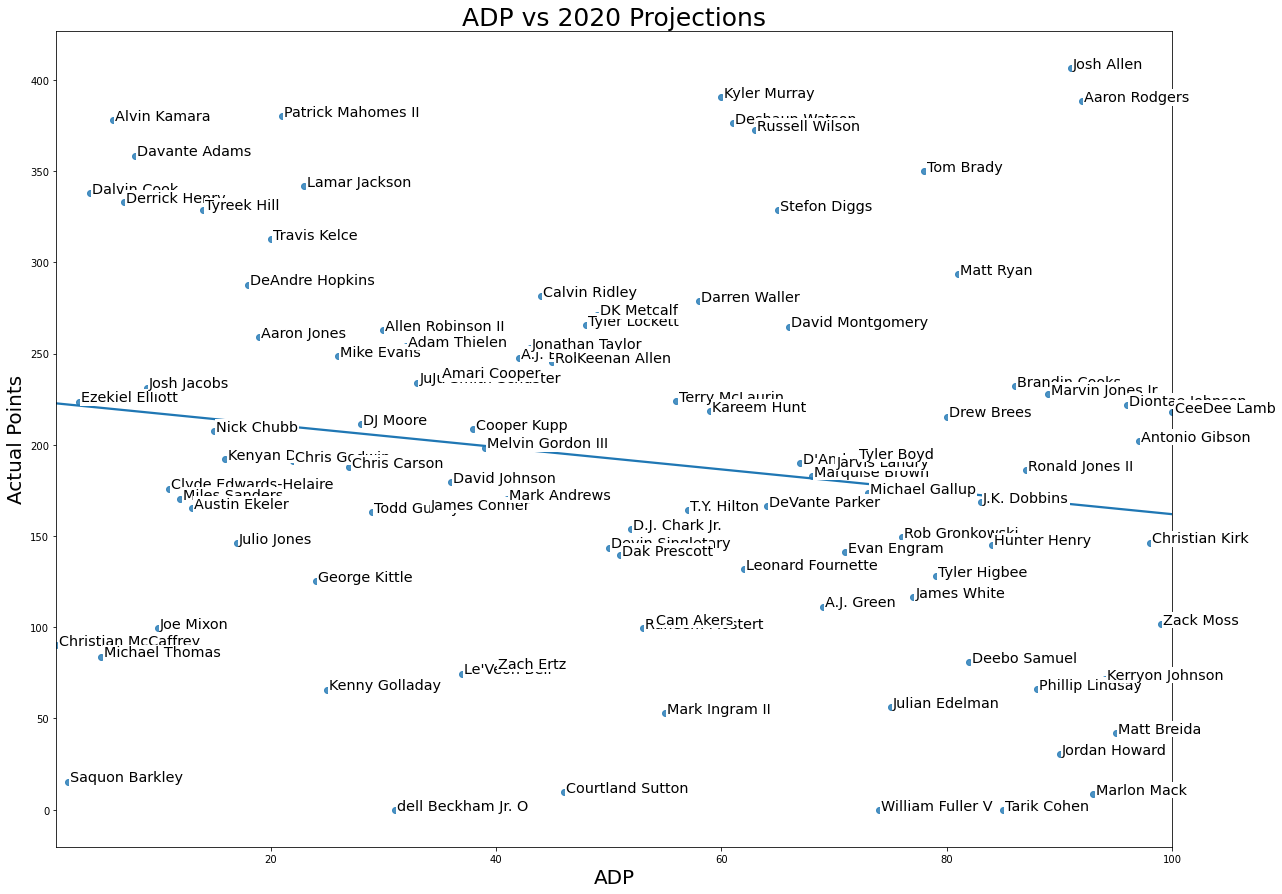

In [59]:
adp_plot(adp_2020_df, '2020');

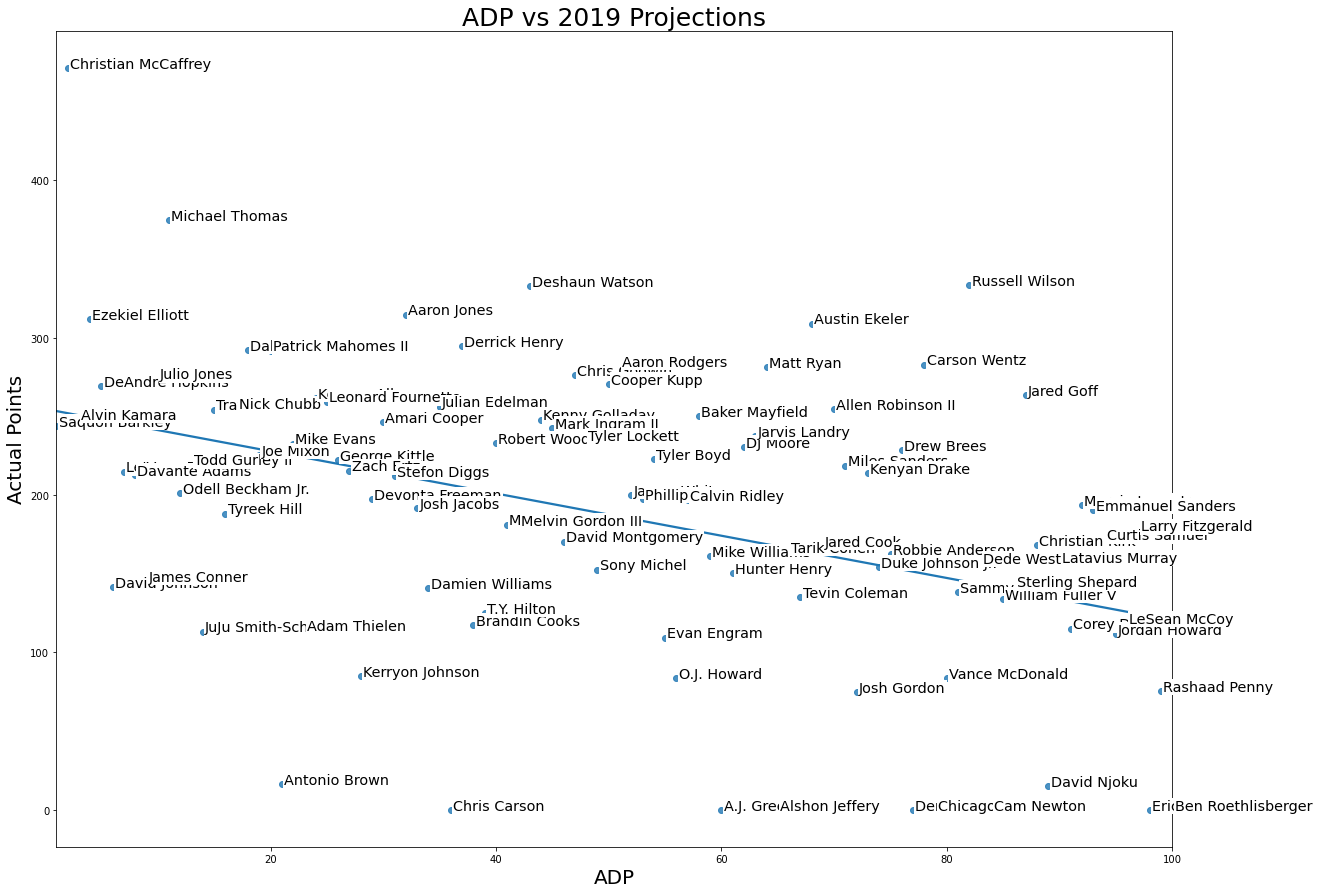

In [60]:
adp_plot(adp_2019_df, '2019');

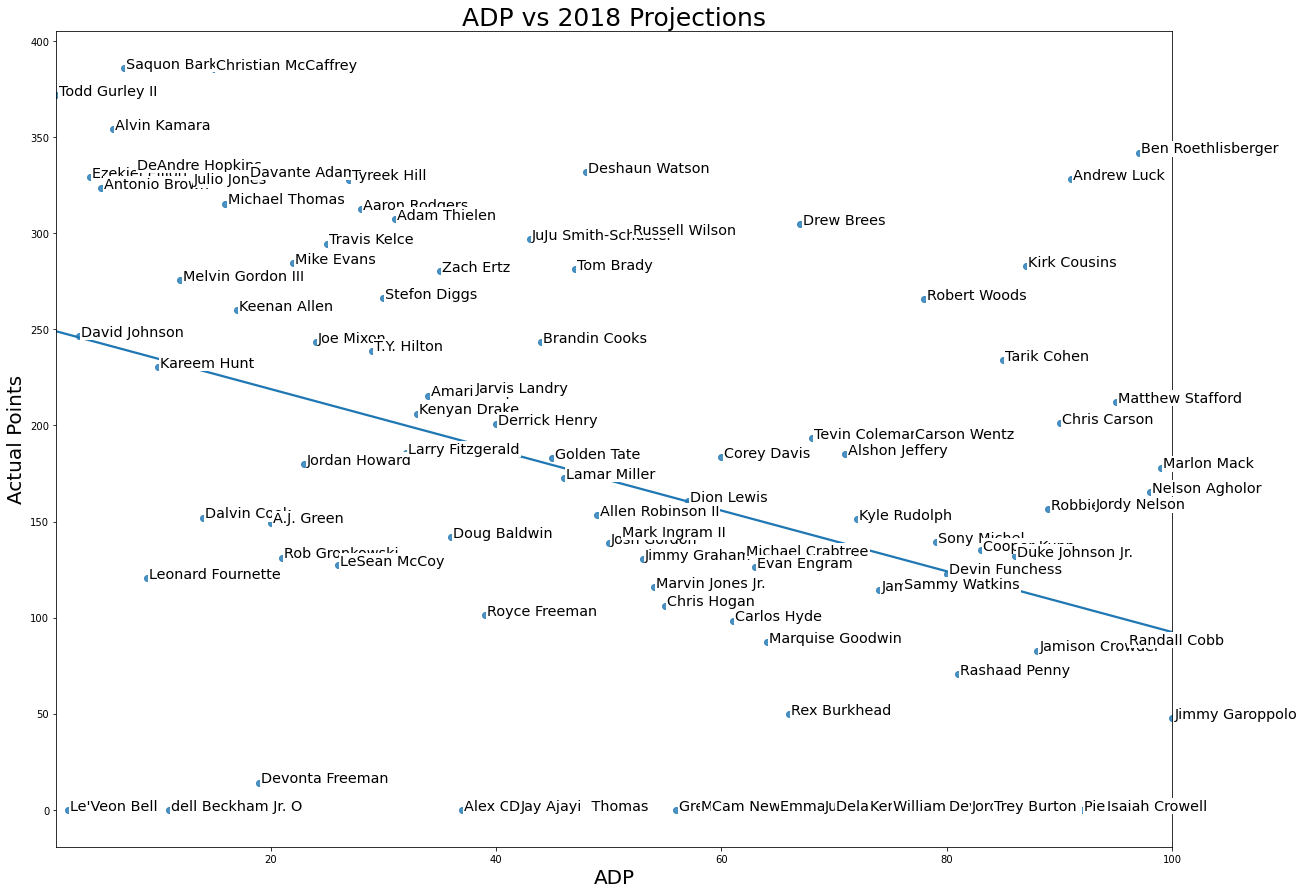

In [61]:
adp_plot(adp_2018_df, '2018');

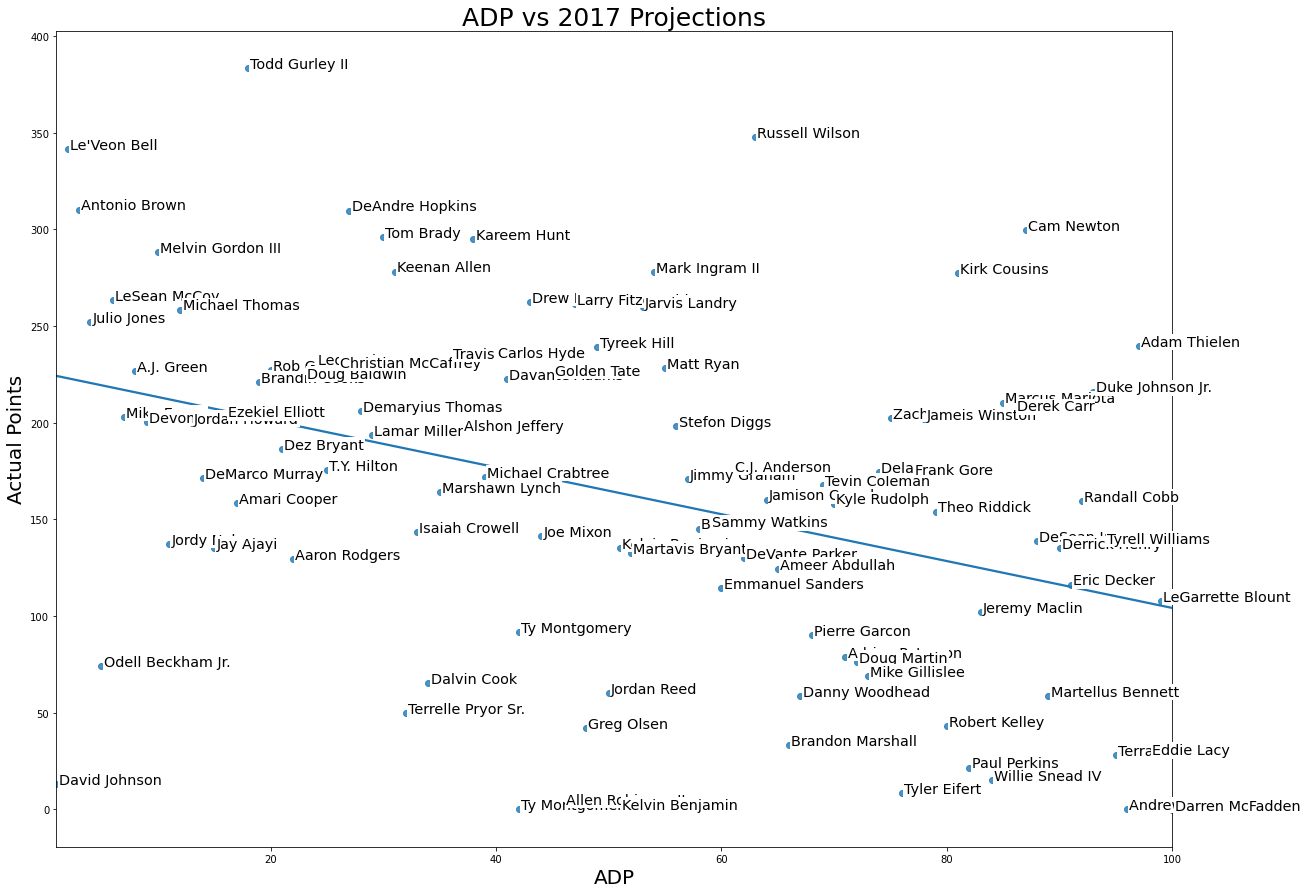

In [63]:
adp_plot(adp_2017_df, '2017');

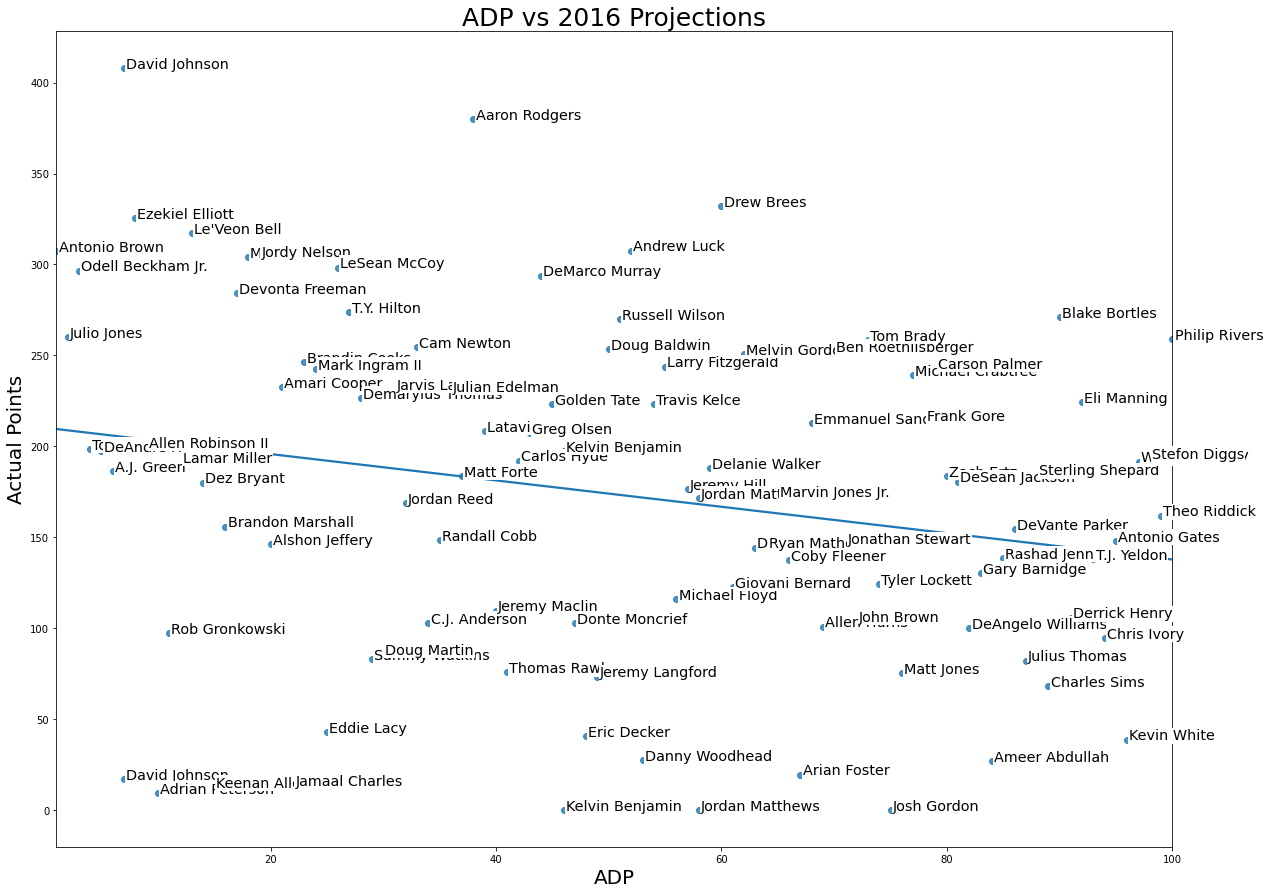

In [62]:
adp_plot(adp_2016_df, '2016');

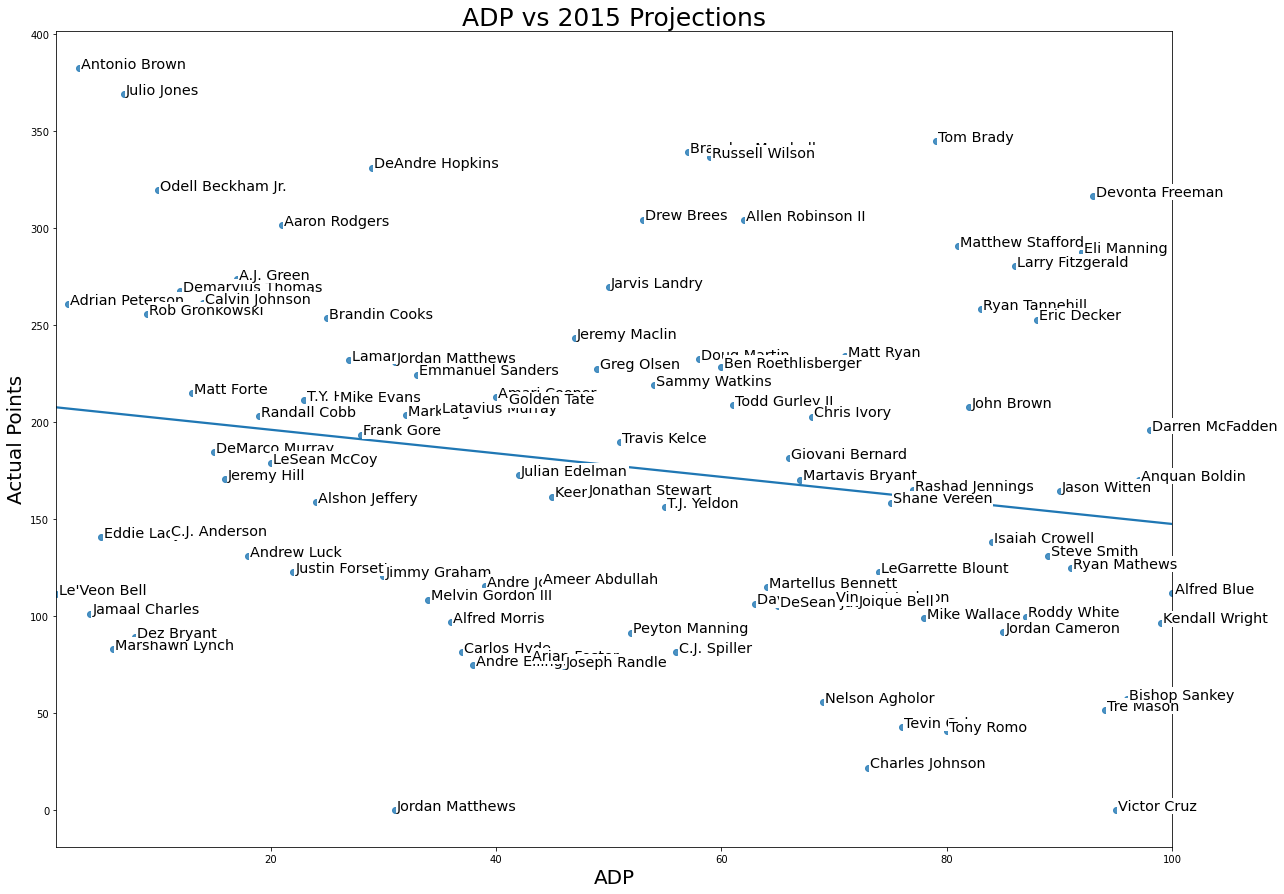

In [64]:
adp_plot(adp_2015_df, '2015');